In [4]:
import tensorflow as tf
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import os

120 examples
- quarter turn
- half turn
- 3 quarter turn
- 4 reflections


Thats 8 examples per image

In [1]:
import subprocess
directories = ["_150_0", "_150_1", "_150_2", "_150_3", "_150_4", "_150_5", "_150_6",
               "_2345_0", "_2345_1", "_2345_2", "_2345_3", "_2345_4", "_2345_5", "_2345_6", "_2345_7", "_2345_8", "_2345_9",
               "_4000_0", "_4000_1", "_4000_2", "_4000_3",
               "_4590_0", "_4590_1", "_4590_2", "_4590_3", "_4590_4", "_4590_5", "_4590_6", "_4590_7", "_4590_8", "_4590_9", "_4590_10", "_4590_11",
               "_31017_0"]
for i in range(len(directories)):
  directories[i] = "subregion" + directories[i]

for folder in directories:
  subprocess.run(("mkdir", folder))

In [2]:
def quarter_turn(img):
  return np.rot90(img, k=1, axes=(0,1))

def half_turn(img):
  return np.rot90(img, 2)

def three_quarter_turn(img):
  return np.rot90(img, 3)

def reflecty(img):
  return np.fliplr(img)

def reflectx(img):
  return np.flipud(img)

def reflectxy(img):
  return np.flipud(np.fliplr(img))

def reflectxy2(img):
  return half_turn(reflectxy(half_turn))

In [22]:
cv.imread("subregion_150_0/NoIR.jpg").shape

(6, 6, 3)

In [27]:
subregion_folders = directories #["subregion_150_0", "subregion_150_1", "subregion_150_2", "subregion_150_3", "subregion_150_4", "subregion_150_5", "subregion_150_6", "subregion_2345_0", "subregion_4590_0", "subregion_4590_1", "subregion_4590_2", "subregion_4590_3", "subregion_31017_0"]
x_train = []
y_train = []

for folder in subregion_folders:
  print(folder)
  noir = cv.imread(folder+ "/NoIR.jpg")/255.0
  optical = cv.imread(folder + "/Optical.jpg")/255.0
  thermal = cv.imread(folder + "/thermal.jpg")/255.0
  conc = np.concatenate([noir, optical], axis=2)
  x_train.append(tf.expand_dims(conc, axis=0))
  y_train.append(tf.expand_dims(thermal, axis=0))
  conc = quarter_turn(conc)
  thermal = quarter_turn(thermal)
  x_train.append(tf.expand_dims(conc, axis=0))
  y_train.append(tf.expand_dims(thermal, axis=0))
  conc = quarter_turn(conc)
  thermal = quarter_turn(thermal)
  x_train.append(tf.expand_dims(conc, axis=0))
  y_train.append(tf.expand_dims(thermal, axis=0))
  conc = quarter_turn(conc)
  thermal = quarter_turn(thermal)
  x_train.append(tf.expand_dims(conc, axis=0))
  y_train.append(tf.expand_dims(thermal, axis=0))
  conc = reflecty(quarter_turn(conc))
  thermal = reflecty(quarter_turn(thermal))
  x_train.append(tf.expand_dims(conc, axis=0))
  y_train.append(tf.expand_dims(thermal, axis=0))
  conc = reflectx(reflecty(conc))
  thermal = reflectx(reflecty(thermal))
  x_train.append(tf.expand_dims(conc, axis=0))
  y_train.append(tf.expand_dims(thermal, axis=0))
  conc = reflectxy(reflectx(conc))
  thermal = reflectxy(reflectx(thermal))
  x_train.append(tf.expand_dims(conc, axis=0))
  y_train.append(tf.expand_dims(thermal, axis=0))


subregion_150_0
subregion_150_1
subregion_150_2
subregion_150_3
subregion_150_4
subregion_150_5
subregion_150_6
subregion_2345_0
subregion_2345_1
subregion_2345_2
subregion_2345_3
subregion_2345_4
subregion_2345_5
subregion_2345_6
subregion_2345_7
subregion_2345_8
subregion_2345_9
subregion_4000_0
subregion_4000_1
subregion_4000_2
subregion_4000_3
subregion_4590_0
subregion_4590_1
subregion_4590_2
subregion_4590_3
subregion_4590_4
subregion_4590_5
subregion_4590_6
subregion_4590_7
subregion_4590_8
subregion_4590_9
subregion_4590_10
subregion_4590_11
subregion_31017_0


In [6]:
x_train[0][0].shape

TensorShape([6, 6, 6])

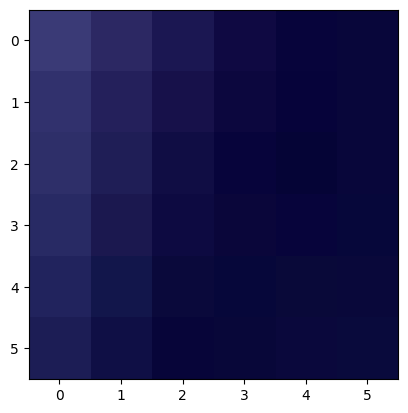

In [7]:
plt.imshow(x_train[0][0].numpy().reshape((6,6,6))[::,::,:3])

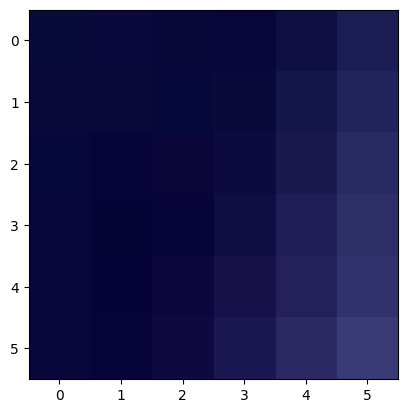

In [8]:
plt.imshow(reflectxy(x_train[0][0].numpy().reshape((6,6,6))[::,::,:3]))

In [9]:
x_train[0]

<tf.Tensor: shape=(1, 6, 6, 6), dtype=float64, numpy=
array([[[[0.22745098, 0.22745098, 0.4627451 , 0.40784314, 0.4627451 ,
          0.54901961],
         [0.17254902, 0.15686275, 0.38823529, 0.2745098 , 0.32941176,
          0.41960784],
         [0.10588235, 0.09019608, 0.32156863, 0.16078431, 0.20784314,
          0.30196078],
         [0.05882353, 0.03529412, 0.25882353, 0.09411765, 0.14117647,
          0.23529412],
         [0.02745098, 0.01568627, 0.23137255, 0.05882353, 0.10196078,
          0.20784314],
         [0.03137255, 0.02352941, 0.22745098, 0.07843137, 0.12156863,
          0.23137255]],

        [[0.19215686, 0.19215686, 0.42745098, 0.37647059, 0.43137255,
          0.51764706],
         [0.14117647, 0.1254902 , 0.35686275, 0.2       , 0.25490196,
          0.34509804],
         [0.09019608, 0.06666667, 0.29019608, 0.10980392, 0.15686275,
          0.25098039],
         [0.04705882, 0.02745098, 0.24313725, 0.09803922, 0.14509804,
          0.23921569],
         [0.02

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(216)))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(27, activation='sigmoid'))

In [24]:
input_layer = tf.keras.Input(shape=(6,6,6))
x = tf.keras.layers.Conv2D(12, kernel_size=(3,3), strides=(2,2), activation='relu', padding='same')(input_layer)
y = tf.keras.layers.Conv2D(12, kernel_size=(2,2), strides=(2,2), activation='relu', padding='valid')(input_layer)
z = tf.keras.layers.concatenate([x, y])
out = tf.keras.layers.Conv2D(3, kernel_size=(1,1), strides=(1,1), activation='sigmoid', padding='same')(z)
model = tf.keras.Model(inputs=input_layer, outputs=out)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 6, 6, 6)        │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 3, 3, 12)       │            660 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 3, 3, 12)       │            300 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 3, 3, 24)       │              0 │ conv2d_3[0][0],        │
│ (Concatenate)             │                        │                │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 3, 3, 3)        │             75 │ concatenate_1[0][0]    │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,035 (4.04 KB)

 Trainable params: 1,035 (4.04 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
y_train[140][0].shape

TensorShape([6, 6, 3])

In [31]:
for i in range(140, 147):
  y_train[i] = tf.expand_dims(y_train[i][0][:3,:3, ::], axis=0)

In [14]:
x_train[0].shape
for i in range(len( x_train)):
  if x_train[i].shape != (1,6,6,6):
    print(i)

In [17]:
len(y_train)

238

In [32]:
y_train[0].shape
for i in range(len( y_train)):
  if y_train[i].shape != (1,3,3,3):
    print(i)

In [20]:
y_train[139].shape

TensorShape([1, 3, 3, 3])

In [21]:
y_train[141].shape

TensorShape([1, 6, 6, 3])

In [33]:
y = model(x_train[0])

In [ ]:
y.shape

TensorShape([1, 3, 3, 3])

In [ ]:
y_train[0].shape

TensorShape([1, 27])

In [ ]:
for i in range(len(x_train)):
  out = model(x_train[i])
  if out.shape != y_train[i].shape:
    print(i)

In [34]:
x_train = np.concatenate(x_train, axis=0)
y_train = np.concatenate(y_train, axis=0)

In [35]:
model.compile(optimizer='adam', loss='mse')
model.fit(x_train, y_train, epochs=250, batch_size=1)

Epoch 1/250
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0835
Epoch 2/250
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0738
Epoch 3/250
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0647
Epoch 4/250
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0660
Epoch 5/250
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0651
Epoch 6/250
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0652
Epoch 7/250
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0638
Epoch 8/250
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0640
Epoch 9/250
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0659
Epoch 10/250
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0658
Epoch 11/250
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0674
Epoch 12/250
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0693
Epoch 13/250
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0615
Epoch 14/250
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0650
Epoch 15/250
238/238 ━━━━━━━━━━━━━━━━━━━━ 0

In [36]:
y = model(tf.expand_dims(x_train[0], axis=0))
y.shape

TensorShape([1, 3, 3, 3])

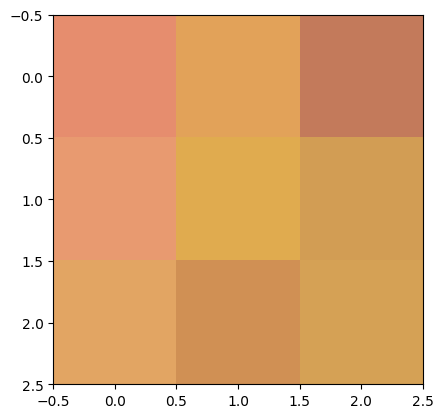

In [37]:
plt.imshow(y[0].numpy()[:,:,::-1])

In [ ]:
# load an entire image
# get a certain region of the image
# split the region into 6x6x6 tensors
# flatten those
# run all of them through the model
# reshape each of the outputs
# put them together

In [38]:
noir = cv.imread("NoIR_5.jpg")
optical = cv.imread("Optical_5.jpg")

In [39]:
noir

array([[[ 20,  23,  74],
        [ 20,  23,  74],
        [ 20,  23,  74],
        ...,
        [ 49,  56, 119],
        [ 49,  56, 119],
        [ 49,  56, 119]],

       [[ 20,  23,  74],
        [ 20,  23,  74],
        [ 20,  23,  74],
        ...,
        [ 49,  56, 119],
        [ 49,  56, 119],
        [ 49,  56, 119]],

       [[ 20,  23,  74],
        [ 20,  23,  74],
        [ 20,  23,  74],
        ...,
        [ 49,  56, 119],
        [ 49,  56, 119],
        [ 49,  56, 119]],

       ...,

       [[ 39,  42,  93],
        [ 39,  42,  93],
        [ 39,  42,  93],
        ...,
        [ 44,  45, 106],
        [ 43,  44, 105],
        [ 42,  43, 104]],

       [[ 39,  42,  93],
        [ 39,  42,  93],
        [ 39,  42,  93],
        ...,
        [ 44,  45, 106],
        [ 43,  44, 105],
        [ 42,  43, 104]],

       [[ 39,  42,  93],
        [ 39,  42,  93],
        [ 39,  42,  93],
        ...,
        [ 44,  45, 106],
        [ 43,  44, 105],
        [ 42,  43, 104]]

In [40]:

noir.shape

(2825, 3875, 3)

In [41]:
optical.shape

(2825, 3875, 3)

cols 1550-2325
rows 848-1423

In [42]:
noir = noir[848:1424,1550:2324, ::]/255.0
optical = optical[848:1424,1550:2324, ::]/255.0
noir

array([[[0.08627451, 0.08627451, 0.24313725],
        [0.08627451, 0.08627451, 0.24313725],
        [0.08627451, 0.08627451, 0.24313725],
        ...,
        [0.12156863, 0.17254902, 0.35294118],
        [0.11372549, 0.16470588, 0.34509804],
        [0.11372549, 0.16470588, 0.34509804]],

       [[0.08627451, 0.08627451, 0.24313725],
        [0.08627451, 0.08627451, 0.24313725],
        [0.08627451, 0.08627451, 0.24313725],
        ...,
        [0.12156863, 0.17254902, 0.35294118],
        [0.11372549, 0.16470588, 0.34509804],
        [0.11372549, 0.16470588, 0.34509804]],

       [[0.08627451, 0.08627451, 0.24313725],
        [0.08627451, 0.08627451, 0.24313725],
        [0.08627451, 0.08627451, 0.24313725],
        ...,
        [0.10980392, 0.17254902, 0.34117647],
        [0.10588235, 0.16862745, 0.3372549 ],
        [0.10196078, 0.16470588, 0.33333333]],

       ...,

       [[0.12941176, 0.11764706, 0.3372549 ],
        [0.1254902 , 0.11372549, 0.32941176],
        [0.12156863, 0

In [43]:
im = tf.concat([optical, noir], axis=-1)

In [44]:
im.shape

TensorShape([576, 774, 6])

In [45]:
out_dims_r = 3*((1424-848)//6)
out_dims_c = 3*((2324-1550)//6)
out_map = np.zeros((out_dims_r, out_dims_c, 3))

In [46]:
for i in range((1424-848)//6):
  for j in range((2324-1550)//6):
    eg = im[i*6:(i+1)*6, j*6:(j+1)*6, :]
    y = model(tf.expand_dims(eg, axis=0))
    out_map[i*3:(i+1)*3, j*3:(j+1)*3, :] = y[0].numpy()[:,:,:]

In [ ]:
for i in range((1424-848)//6):
  for j in range((2324-1550)//6):
    eg = im[i*6:(i+1)*6,j*6:(j+1)*6, :]
    x = [0 for i in range(216)]
    x1 = eg[:,:,:3]
    x2 = eg[:,:, 3:]
    x[:108] = x1.numpy().flatten()
    x[108:] = x2.numpy().flatten()
    x = tf.expand_dims(x, axis=0)
    y = model(x)
    out_map[i*3:(i+1)*3, j*3:(j+1)*3, :] = y[0].numpy().reshape((3,3,3))[:,:,:]


ValueError: Input 0 of layer "functional_9" is incompatible with the layer: expected shape=(None, 6, 6, 6), found shape=(1, 216)

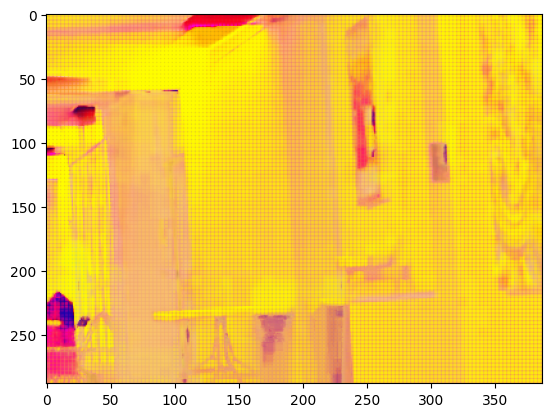

In [47]:
plt.imshow(out_map[:,:,::-1])

In [ ]:
cv.imwrite("output.jpg", out_map[:,:,::]*255)

True

In [ ]:
for layer in model.layers:
  print(layer.weights)

[<tf.Variable 'dense_3/kernel:0' shape=(216, 256) dtype=float32, numpy=
array([[ 0.0117673 ,  0.10077249,  0.0563008 , ...,  0.10183574,
         0.06101254,  0.00269516],
       [ 0.09879463,  0.04321879,  0.16564395, ...,  0.2968374 ,
        -0.07856615, -0.03773309],
       [ 0.05178026,  0.08671924,  0.17161757, ..., -0.02859531,
         0.01502883, -0.1019043 ],
       ...,
       [ 0.02964187, -0.09974366, -0.20264974, ...,  0.01554576,
        -0.03569087, -0.03185689],
       [-0.02295404,  0.05576853, -0.02681546, ..., -0.05109042,
        -0.07555678,  0.09344696],
       [-0.11885278,  0.00364437, -0.06229516, ...,  0.0591534 ,
         0.02679477,  0.09496647]], dtype=float32)>, <tf.Variable 'dense_3/bias:0' shape=(256,) dtype=float32, numpy=
array([-0.04607461,  0.00436944,  0.0932868 , -0.16968131, -0.01064633,
        0.        , -0.0036604 ,  0.18431456, -0.00236068,  0.        ,
       -0.07003907, -0.01032156,  0.        ,  0.        , -0.00498799,
        0.       